In [1]:
import tensorflow as tf 
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


#importing tensorflow 

#importing keras keras is a high level api of the tensorflow platform

#api:-An API, or application programming interface, is a set of 
#rules or protocols that let software applications communicate
#with each other to exchange data, features and functionality.

#importing matplotlib

In [2]:
BATCH_SIZE = 30
IMAGE_SIZE = 234
CHANNELS=3
EPOCHS=50

#we are initialising the constants

#batch size of images is 30 

#image size across all images is 234*234 resizing

#epochs this is a tryle error for bettrer accuracy of our model epochs ranging from 
#10,20,30,40,50....

#channels means the ANY IMAGE have a rgb

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "skin-disease-datasaet",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE)
#by using keras method we are retriving our dataset for training

#the seed() method used to initialize the random number generator

#shuffeling the images for better accuracy

#we are giving the image size 234*234

#and also giving the batch size it loads the all images and 
#devides in batches as 32 images per batch

Found 1168 files belonging to 7 classes.


In [4]:
class_names = dataset.class_names
class_names

# there is total 8 classes of skin disease dataset 

['BA- cellulitis',
 'BA-impetigo',
 'FU-athlete-foot',
 'FU-nail-fungus',
 'FU-ringworm',
 'VI-chickenpox',
 'VI-shingles']

In [5]:
len(dataset)

#return the number of elements (length) in an iterator/object
#passed to the function

39

(30, 234, 234, 3)
[5 5 4 5 1 0 4 6 4 3 2 4 4 5 1 3 4 4 1 4 1 2 0 3 4 4 6 3 6 3]


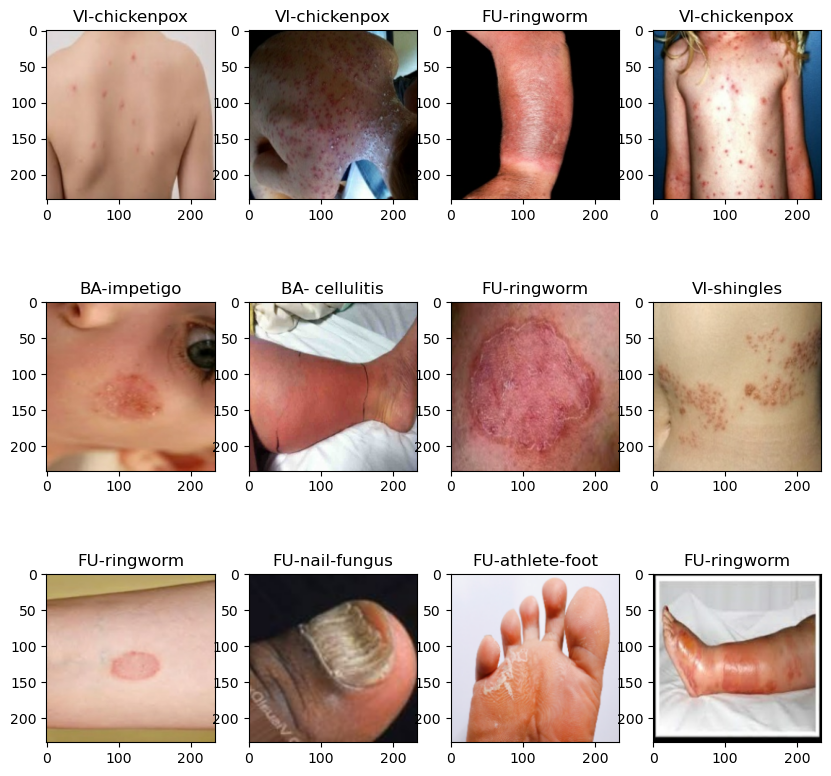

In [6]:

plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):


    print(image_batch.shape)
    print(labels_batch.numpy())
    
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        
        
        
        # here we are visulize the images of skin disease 
#with axis and with their class names   

(30, 234, 234, 3)
[2 4 4 1 2 0 4 3 1 6 3 6 3 4 4 3 0 0 1 5 4 0 4 4 4 5 1 4 4 5]


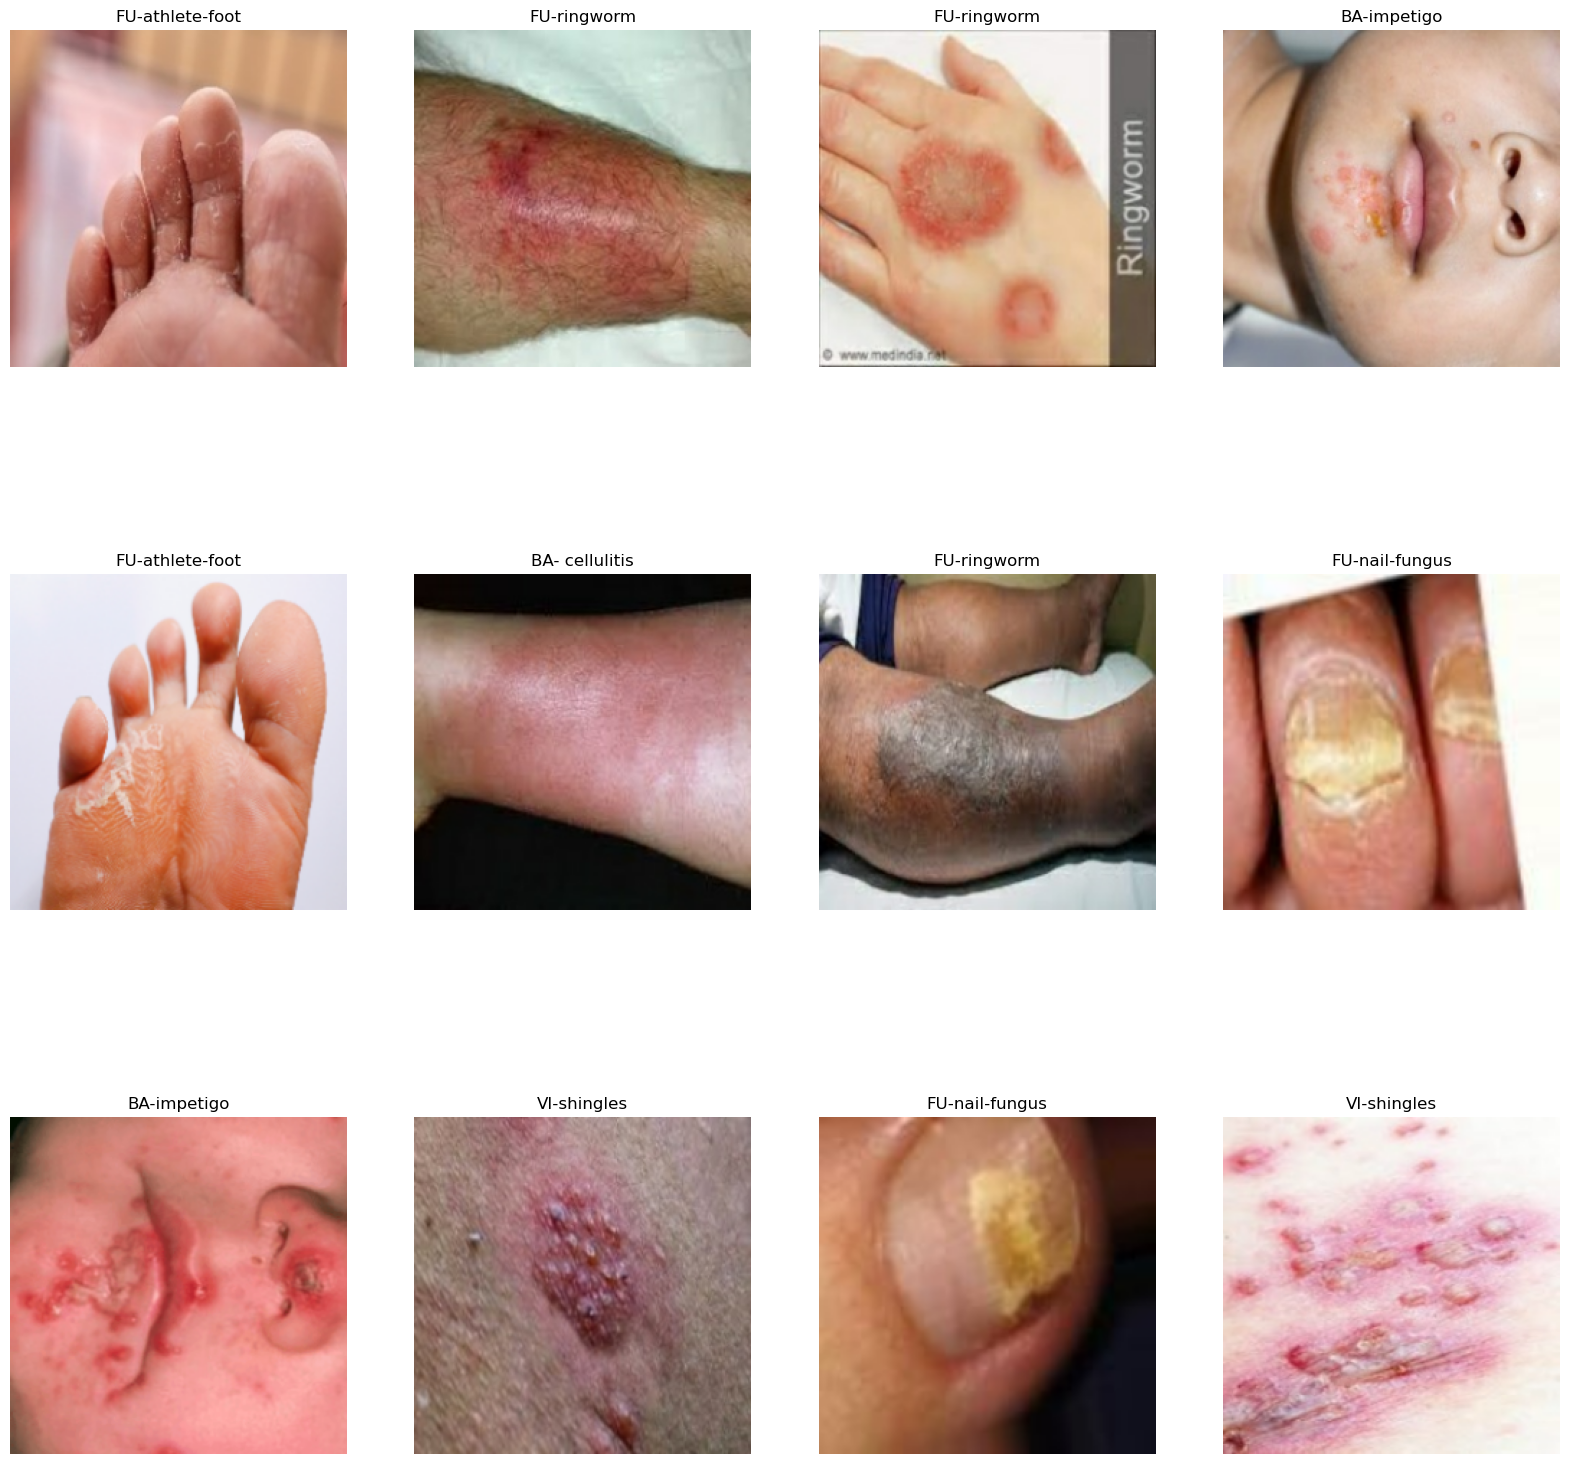

In [7]:

plt.figure(figsize=(20,20))
for image_batch, labels_batch in dataset.take(1):


    print(image_batch.shape)
    print(labels_batch.numpy())
    
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[labels_batch[i]])
        
        
        # here we are visulize the images of skin disease 
#without axis and with their class names 

In [8]:
#              80% ==> training
#               20% ==> testing
               
    
    
#       10% ==> validation
    
#        10% ==> test
        
        #here we are deciding parts of our dataset for trainimng 
        #for testing and validation
        

In [9]:
train_size = 0.8
len(dataset)*train_size


#we are using 80% of data for traing 

31.200000000000003

In [10]:
train_ds = dataset.take(35)
len(train_ds)

#we are keeping the train size of 35 for training of dataset


35

In [11]:
test_ds = dataset.skip(35) 
len(test_ds)

##we are keeping the train size of 35 for training of dataset 
#and remaining are skipped and keeping for testing and validation

4

In [12]:
validation_size=0.1
len(dataset)*validation_size

#we are again spliting data in two parts 1 
#is for validation and another is for test

3.9000000000000004

In [13]:
validation_ds = test_ds.take(4)
len(validation_ds)

#we are keeping this for validation 

4

In [14]:
test_ds = test_ds.skip(4)
len(test_ds)

#we are using this data for testing 

0

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8, validation_split=0.1,test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + validation_split) == 1
    
    #we are insuring the our data is 100% used or not by using assert
    #method
    
    ds_size = len(ds)
    
    #length of dataset
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    #actually splitting the data
    train_size = int(train_split * ds_size)
    validation_size = int(validation_split * ds_size)
    
    train_ds = ds.take(train_size)    
    validation_ds = ds.skip(train_size).take(validation_size)
    test_ds = ds.skip(train_size).skip(validation_size)
    
    return train_ds, validation_ds, test_ds

In [16]:
train_ds, validation_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

#train dataset is 80% and their length is 35

31

In [18]:
len(validation_ds)

#validation dataset is 10% and their length is 4

3

In [19]:
len(test_ds)

#test dataset is 10% and their length is 5

5

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


#cache keeping the data in memory so it reduces the time

In [21]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

    
    # images are shown like tha in 3 dimentional array rgb form

[[[133.       117.       127.      ]
  [133.       117.       127.      ]
  [133.       116.106834 126.106834]
  ...
  [247.       237.       248.      ]
  [247.       237.       248.      ]
  [247.       237.       248.      ]]

 [[133.       117.       127.      ]
  [133.       117.       127.      ]
  [133.8359   116.94275  126.94275 ]
  ...
  [247.       237.       248.      ]
  [247.       237.       248.      ]
  [247.       237.       248.      ]]

 [[133.       117.       127.      ]
  [133.       117.       127.      ]
  [133.89316  117.       127.      ]
  ...
  [247.       237.       248.      ]
  [247.       237.       248.      ]
  [247.       237.       248.      ]]

 ...

 [[176.       173.       192.      ]
  [176.       173.       192.      ]
  [176.       173.       190.21367 ]
  ...
  [210.10684  199.10684  215.10684 ]
  [210.10684  199.10684  215.10684 ]
  [210.10684  199.10684  215.10684 ]]

 [[176.       173.       192.      ]
  [176.       173.       192.      ]


In [22]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy().shape)
    
    
    # we showing the shape of image batch

(234, 234, 3)


In [23]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/234)
    
    
    # normalising the 3 dimentional array 
    # nromalising the 3 d array by using image size divide the 3 d
    #array for 3d array converting 0 1form

[[[0.9230769  0.8418803  0.7008547 ]
  [0.9378698  0.85667324 0.7156476 ]
  [0.92691207 0.8457155  0.70468986]
  ...
  [0.57500553 0.47671497 0.3442363 ]
  [0.5631986  0.46490803 0.3324294 ]
  [0.52991456 0.43162394 0.2991453 ]]

 [[0.90458584 0.82338923 0.68236357]
  [0.92257905 0.8413825  0.70035684]
  [0.91498774 0.83379114 0.69276553]
  ...
  [0.56677943 0.4684888  0.3360102 ]
  [0.5526018  0.45431122 0.32183257]
  [0.5225181  0.4242275  0.29174885]]

 [[0.8917653  0.8105687  0.6695431 ]
  [0.9073879  0.8261913  0.68516564]
  [0.902445   0.8212484  0.6802228 ]
  ...
  [0.55738306 0.45909247 0.3266138 ]
  [0.538587   0.4402964  0.30781776]
  [0.5147381  0.4164475  0.28396887]]

 ...

 [[0.8010628  0.6856782  0.5617466 ]
  [0.8113278  0.6959432  0.5720116 ]
  [0.8154956  0.700111   0.5828088 ]
  ...
  [0.57073206 0.45962095 0.3442363 ]
  [0.5662668  0.45515567 0.33977103]
  [0.5588703  0.44775918 0.33237457]]

 [[0.8082676  0.69288296 0.5689513 ]
  [0.8141706  0.69878596 0.5748543 ]


In [24]:
resize_and_rescale = tf.keras.Sequential ([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./234),
]
)


# keras layer :- keras layer we use for normalise and scaling

In [25]:
data_augmentation = tf.keras.Sequential ([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
]
)

#augmentation code is here

In [26]:
# model

In [27]:
CHANNELS

3

In [28]:
BATCH_SIZE

30

In [29]:
IMAGE_SIZE

234

In [30]:
IMAGE_SIZE

234

In [31]:
EPOCHS

50

In [32]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 8

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (30, 234, 234, 3)         0         
                                                                 
 conv2d (Conv2D)             (30, 232, 232, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (30, 116, 116, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (30, 114, 114, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (30, 57, 57, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (30, 55, 55, 64)         

In [34]:
#model compilation

In [35]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [36]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=validation_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/50


31/31 [==============================] - 18s 450ms/step - loss: 1.9738 - accuracy: 0.2086 - val_loss: 1.9929 - val_accuracy: 0.2111
Epoch 2/50
31/31 [==============================] - 13s 410ms/step - loss: 1.9382 - accuracy: 0.2280 - val_loss: 2.0680 - val_accuracy: 0.2111
Epoch 3/50
31/31 [==============================] - 13s 414ms/step - loss: 1.9404 - accuracy: 0.2108 - val_loss: 1.9264 - val_accuracy: 0.2111
Epoch 4/50
31/31 [==============================] - 12s 403ms/step - loss: 1.9285 - accuracy: 0.2280 - val_loss: 1.9653 - val_accuracy: 0.1333
Epoch 5/50
31/31 [==============================] - 13s 421ms/step - loss: 1.9223 - accuracy: 0.2258 - val_loss: 1.9262 - val_accuracy: 0.2111
Epoch 6/50
31/31 [==============================] - 13s 420ms/step - loss: 1.9111 - accuracy: 0.2344 - val_loss: 1.9097 - val_accuracy: 0.2111
Epoch 7/50
31/31 [==============================] - 13s 435ms/step - loss: 1.8825 - accuracy: 0.2269 - val_loss: 1.7485 - val_accuracy: 0.18

In [37]:
len(test_ds)

5

In [38]:
scores = model.evaluate(test_ds)

5/5 [==============================] - 1s 96ms/step - loss: 0.3027 - accuracy: 0.8467


In [39]:
scores


[0.3027476668357849, 0.846666693687439]

In [40]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 31}

In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [42]:
history.history['loss']

[1.9738339185714722,
 1.9381557703018188,
 1.9404243230819702,
 1.928538203239441,
 1.9222822189331055,
 1.9110777378082275,
 1.8825355768203735,
 1.8581843376159668,
 1.8027384281158447,
 1.724708080291748,
 1.685932993888855,
 1.6102867126464844,
 1.5578404664993286,
 1.4558842182159424,
 1.3179473876953125,
 1.2469050884246826,
 1.1510121822357178,
 1.029668927192688,
 0.9218735694885254,
 0.8638212084770203,
 0.8302098512649536,
 0.7697900533676147,
 0.6836472153663635,
 0.5735990405082703,
 0.5661851167678833,
 0.4787418842315674,
 0.45206600427627563,
 0.46740245819091797,
 0.39749574661254883,
 0.3324583172798157,
 0.28765052556991577,
 0.2917656898498535,
 0.3150942027568817,
 0.281118780374527,
 0.28731560707092285,
 0.331818550825119,
 0.25952601432800293,
 0.26081302762031555,
 0.23800010979175568,
 0.2542344033718109,
 0.24033741652965546,
 0.22291268408298492,
 0.20677544176578522,
 0.19882544875144958,
 0.1946766972541809,
 0.2024437040090561,
 0.20102636516094208,
 0.196

In [43]:
history.history['accuracy']

[0.2086021453142166,
 0.22795699536800385,
 0.2107526808977127,
 0.22795699536800385,
 0.22580644488334656,
 0.23440860211849213,
 0.2268817275762558,
 0.23333333432674408,
 0.23763440549373627,
 0.3032258152961731,
 0.3053763508796692,
 0.34408602118492126,
 0.36666667461395264,
 0.4236559271812439,
 0.43655914068222046,
 0.46451613306999207,
 0.5301074981689453,
 0.551612913608551,
 0.6161290407180786,
 0.6408601999282837,
 0.6494623422622681,
 0.6892473101615906,
 0.7032257914543152,
 0.7591397762298584,
 0.7387096881866455,
 0.7860215306282043,
 0.7978494763374329,
 0.7913978695869446,
 0.8225806355476379,
 0.8333333134651184,
 0.8569892644882202,
 0.8569892644882202,
 0.8580645322799683,
 0.8698924779891968,
 0.8537634611129761,
 0.8387096524238586,
 0.8623656034469604,
 0.8634408712387085,
 0.8580645322799683,
 0.8709677457809448,
 0.8580645322799683,
 0.8634408712387085,
 0.8698924779891968,
 0.874193549156189,
 0.8817204236984253,
 0.8806451559066772,
 0.8763440847396851,
 0.88

In [44]:
history.history['val_loss']

[1.9928637742996216,
 2.068028688430786,
 1.9263890981674194,
 1.9653418064117432,
 1.9262174367904663,
 1.909663200378418,
 1.7484644651412964,
 1.909326195716858,
 1.7313766479492188,
 1.6075005531311035,
 1.5668084621429443,
 1.452109456062317,
 1.4384331703186035,
 1.3375459909439087,
 1.2116317749023438,
 1.2161591053009033,
 1.1083859205245972,
 1.1326861381530762,
 0.9878262281417847,
 0.904630184173584,
 0.9646958112716675,
 0.9099671840667725,
 0.8151379227638245,
 0.8615307211875916,
 0.8237286806106567,
 0.8921593427658081,
 0.9712492227554321,
 0.7456813454627991,
 0.9755260944366455,
 0.9311531782150269,
 0.8336653113365173,
 1.0808995962142944,
 0.7883270978927612,
 0.8315544128417969,
 0.6389732360839844,
 0.8041892051696777,
 0.6982254385948181,
 0.8141776323318481,
 0.9933658838272095,
 0.6916584968566895,
 0.7194416522979736,
 0.8549080491065979,
 0.9448063969612122,
 0.9183657169342041,
 0.9388325810432434,
 0.9424002766609192,
 0.9112974405288696,
 1.031702518463134

In [45]:
history.history['val_accuracy']

[0.21111111342906952,
 0.21111111342906952,
 0.21111111342906952,
 0.13333334028720856,
 0.21111111342906952,
 0.21111111342906952,
 0.18888889253139496,
 0.2222222238779068,
 0.30000001192092896,
 0.31111112236976624,
 0.3444444537162781,
 0.4333333373069763,
 0.4333333373069763,
 0.42222222685813904,
 0.4888888895511627,
 0.5111111402511597,
 0.5111111402511597,
 0.5,
 0.5333333611488342,
 0.5555555820465088,
 0.6000000238418579,
 0.6111111044883728,
 0.644444465637207,
 0.6888889074325562,
 0.6666666865348816,
 0.6888889074325562,
 0.6888889074325562,
 0.7777777910232544,
 0.7111111283302307,
 0.7555555701255798,
 0.7555555701255798,
 0.7222222089767456,
 0.7222222089767456,
 0.7111111283302307,
 0.7888888716697693,
 0.7555555701255798,
 0.7333333492279053,
 0.7333333492279053,
 0.7555555701255798,
 0.7666666507720947,
 0.7777777910232544,
 0.7777777910232544,
 0.7666666507720947,
 0.7444444298744202,
 0.7666666507720947,
 0.7444444298744202,
 0.7666666507720947,
 0.7555555701255798

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

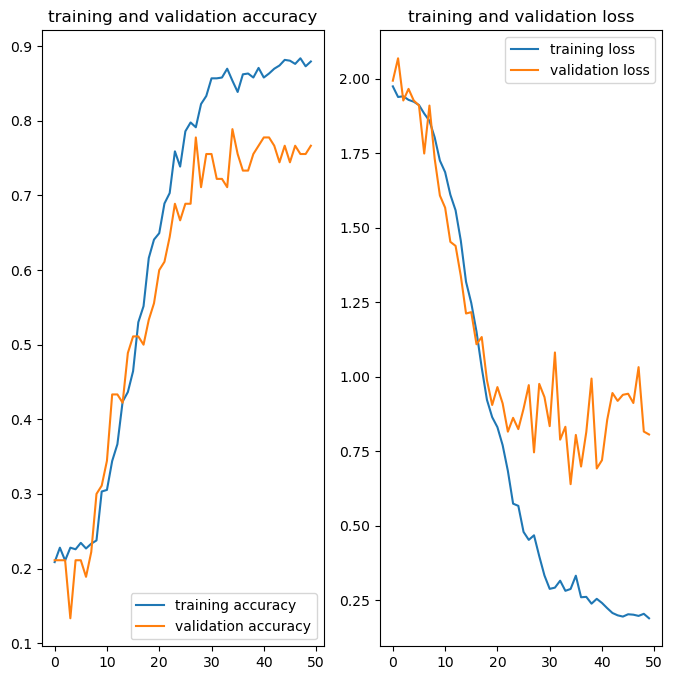

In [47]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='training accuracy')
plt.plot(range(EPOCHS), val_acc, label='validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label='training loss')
plt.plot(range(EPOCHS),val_loss, label='validation loss')
plt.legend(loc='upper right')
plt.title('training and validation loss')
plt.show()

first image to predict
actual label: FU-ringworm
1/1 [==============================] - 0s 329ms/step
predicted label: FU-ringworm


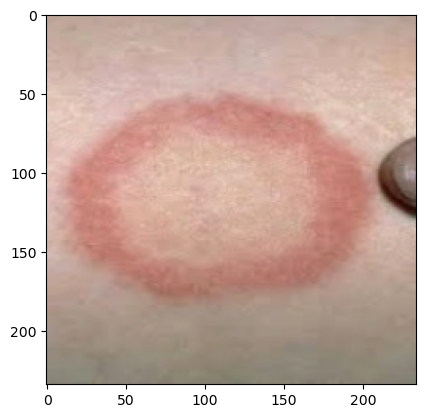

In [48]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    

In [49]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)   #create a image array
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 37ms/step


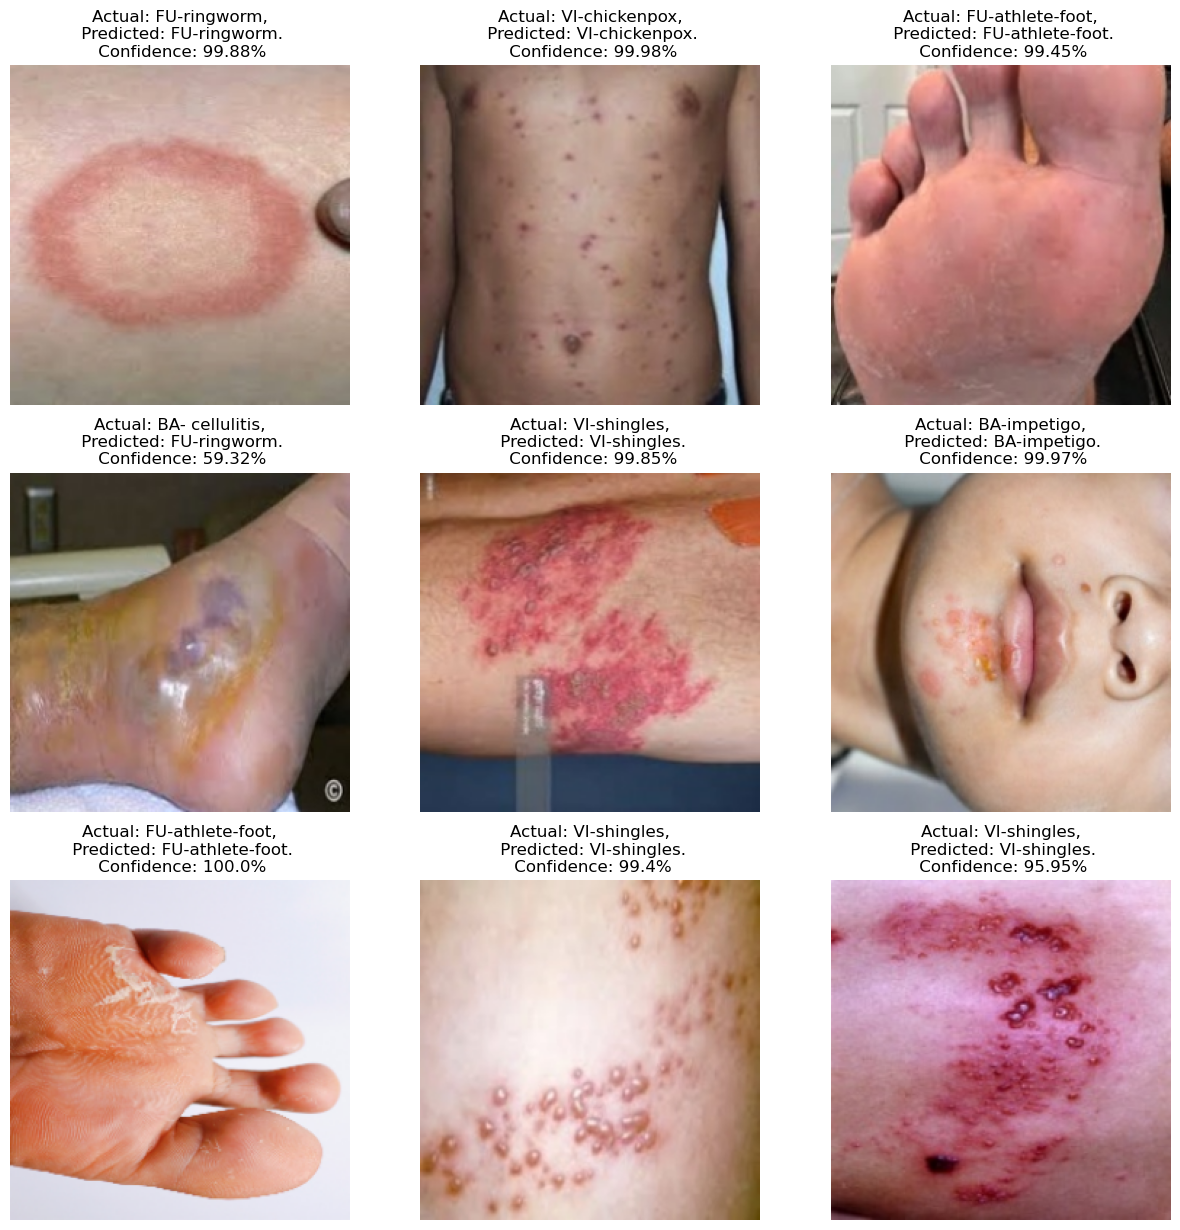

In [50]:
import numpy as np 
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

1/1 [==============================] - 0s 35ms/step


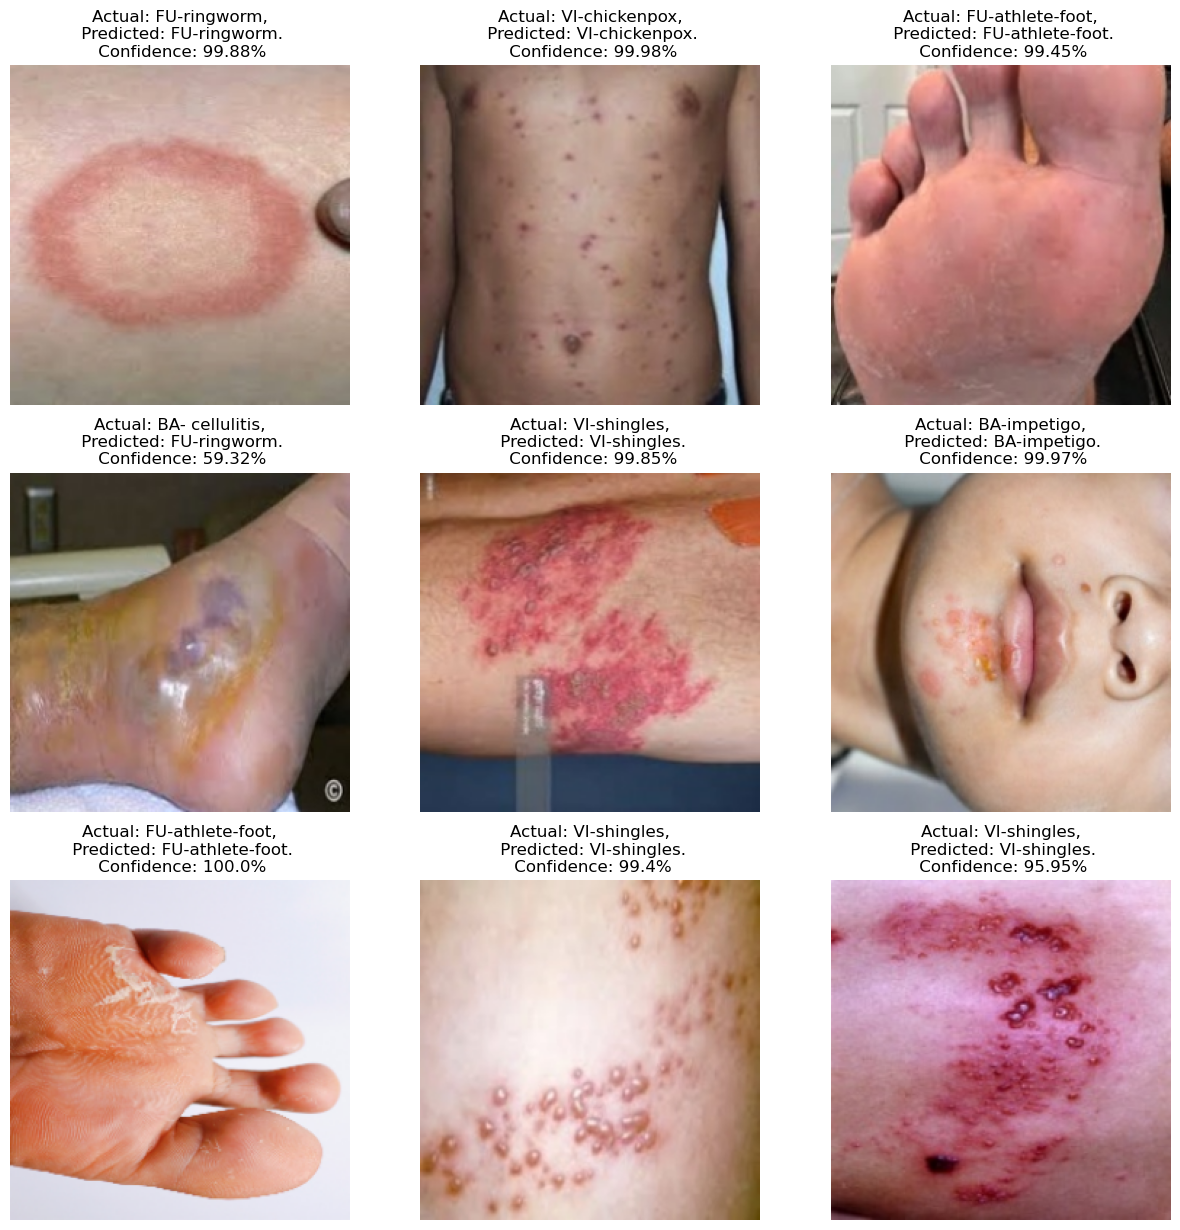

In [51]:
import numpy as np 
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [52]:
# os.listdir("../model")

In [53]:
# import os 
# model_version = max([int(i) for i in (os.listdir("../model")+[0])]) + 1
# # model.save(f"../model/{model_version}")

In [54]:
import os
from keras.models import load_model

directory_path = "../models3"

# Check if the directory exists, if not, create it
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Get existing model versions
existing_models = [filename for filename in os.listdir(directory_path) if filename.startswith("model_")]

# Extract version numbers
model_versions = [int(filename.split("_")[1].split(".")[0]) for filename in existing_models]

# Determine the next model version
if model_versions:
    model_version = max(model_versions) + 1
else:
    model_version = 1

# Save the model
model.save(os.path.join(directory_path, f"model_{model_version}.h5"))

C:\Users\anike\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
model.save("../skin.h5")

In [56]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Load the saved model from the H5 file
model = load_model("skin.h5")

# Function to get predictions and true labels from a dataset
def get_predictions_and_labels(model, dataset):
    predictions = []
    true_labels = []
    
    for images, labels in dataset:
        batch_predictions = model.predict(images)
        batch_predictions = np.argmax(batch_predictions, axis=1)
        
        predictions.extend(batch_predictions)
        true_labels.extend(labels.numpy())
    
    return np.array(predictions), np.array(true_labels)

# Get predictions and true labels for the test dataset
predictions, true_labels = get_predictions_and_labels(model, test_ds)

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predictions, average=None)
recall = recall_score(true_labels, predictions, average=None)
f1 = f1_score(true_labels, predictions, average=None)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

# Display the results
print(results_df)

1/1 [==============================] - 0s 134ms/step


C:\Users\anike\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anike\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: All arrays must be of the same length

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Load the saved model from the H5 file
model = load_model("skin.h5")

# Function to get predictions and true labels from a dataset
def get_predictions_and_labels(model, dataset):
    predictions = []
    true_labels = []
    
    for images, labels in dataset:
        batch_predictions = model.predict(images)
        batch_predictions = np.argmax(batch_predictions, axis=1)
        
        predictions.extend(batch_predictions)
        true_labels.extend(labels.numpy())
    
    return np.array(predictions), np.array(true_labels)

# Get predictions and true labels for the test dataset
predictions, true_labels = get_predictions_and_labels(model, test_ds)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)

# Display the accuracy
print("Accuracy:", accuracy)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved model from the H5 file
model = load_model("skin.h5")

# Function to plot a confusion matrix
def plot_confusion_matrix(true_labels, predictions, class_names):
    cm = confusion_matrix(true_labels, predictions)
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Function to get predictions and true labels from a dataset
def get_predictions_and_labels(model, dataset):
    predictions = []
    true_labels = []
    
    for images, labels in dataset:
        batch_predictions = model.predict(images)
        batch_predictions = np.argmax(batch_predictions, axis=1)
        
        predictions.extend(batch_predictions)
        true_labels.extend(labels.numpy())
    
    return np.array(predictions), np.array(true_labels)

# Get predictions and true labels for the test dataset
predictions, true_labels = get_predictions_and_labels(model, test_ds)

# Plot the confusion matrix
plot_confusion_matrix(true_labels, predictions, class_names)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import numpy as np

# Load the saved model from the H5 file
model = load_model("skin.h5")

# Function to get predictions and true labels from a dataset
def get_predictions_and_labels(model, dataset):
    predictions = []
    true_labels = []
    
    for images, labels in dataset:
        batch_predictions = model.predict(images)
        batch_predictions = np.argmax(batch_predictions, axis=1)
        
        predictions.extend(batch_predictions)
        true_labels.extend(labels.numpy())
    
    return np.array(predictions), np.array(true_labels)

# Get predictions and true labels for the test dataset
predictions, true_labels = get_predictions_and_labels(model, test_ds)

# Generate a classification report

class_names = ['BA- cellulitis',
 'BA-impetigo',
 'FU-athlete-foot',
 'FU-nail-fungus',
 'FU-ringworm',
 'PA-cutaneous-larva-migrans',
 'VI-chickenpox',
 'VI-shingles']
report = classification_report(true_labels, predictions, target_names=class_names)

# Display class-wise accuracy
print(report)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, precision_score, f1_score, confusion_matrix, recall_score
import numpy as np

# Load the saved model from the H5 file
model = load_model("skin.h5")

# Function to get predictions and true labels from a dataset
def get_predictions_and_labels(model, dataset):
    predictions = []
    true_labels = []
    
    for images, labels in dataset:
        batch_predictions = model.predict(images)
        batch_predictions = np.argmax(batch_predictions, axis=1)
        
        predictions.extend(batch_predictions)
        true_labels.extend(labels.numpy())
    
    return np.array(predictions), np.array(true_labels)

# Get predictions and true labels for the test dataset
predictions, true_labels = get_predictions_and_labels(model, test_ds)

# Calculate precision, recall, F1 score, specificity, and confusion matrix
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
f1 = f1_score(true_labels, predictions, average='weighted')
conf_matrix = confusion_matrix(true_labels, predictions)

# Calculate specificity
TN = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
FP = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TN = TN.astype(float)
FP = FP.astype(float)

specificity = np.nan_to_num(TN / (TN + FP), nan=0.0)

# Calculate average specificity
average_specificity = np.mean(specificity)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print(f'Average Specificity: {average_specificity:.2f}')
